## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
# import scipy.stats as st
from scipy import stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
## What kind of merge to use? I think an OUTER join on MOUSE ID
study_merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")


# Display the data table for preview
study_merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
num_mice = len(study_merge_df['Mouse ID'].unique())

# study_merge_df.count() shows that there are no incomplete rows (1893 entries for each column)
print(f'There are {num_mice} unique Mouse IDs listed in this study.')

There are 249 unique Mouse IDs listed in this study.


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
study_merge_df['Mouse ID'].value_counts() #Mouse ID g989 has 13 occurences - 3 more than any other ID. This is probably the duplicate.

# study_merge_df['Mouse ID'].unique() #Lists all unique Mouse IDs.
# study_merge_df['Timepoint'].value_counts() #Shows a decreasing number of mice over time - presumably due to premature cancer/treatment death. 
# study_merge_df['Timepoint'].unique() #Shows all unique Timepoint values - there should only be 10 values (0 to 45 by fives) and there are. So no errors here.

g989    13
s337    10
m269    10
a685    10
r944    10
        ..
x336     1
f932     1
v199     1
b447     1
h428     1
Name: Mouse ID, Length: 249, dtype: int64

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
# study_merge_df.loc[(study_merge_df['Mouse ID'] == 'j296')] # a normal entry, for comparison

# The anomalous entry with duplicate Timepoint values:
duplicate = study_merge_df.loc[(study_merge_df['Mouse ID'] == 'g989')] 
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [67]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_df = study_merge_df.loc[(study_merge_df['Mouse ID'] != 'g989')] 
clean_study_df #Shows that g989's 13 rows have been removed

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_study_df['Mouse ID'].value_counts() #Shows there are now 248 mice in 'Mouse ID' - one less than previously. 

# clean_study_df.loc[(clean_study_df['Mouse ID'] == 'g989')] #To verify g989 has been removed - success, this returns no entries. 

s337    10
m269    10
a685    10
r944    10
f345    10
        ..
x226     1
u153     1
b447     1
f932     1
n482     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [9]:
clean_study_df['Drug Regimen'].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimens_group_df = clean_study_df.groupby("Drug Regimen")
# regimens_group_df.head()


meanTumor = round(regimens_group_df['Tumor Volume (mm3)'].mean(), 2)
# meanTumor

medianTumor = round(regimens_group_df['Tumor Volume (mm3)'].median(), 2)
# medianTumor

stdTumor = round(regimens_group_df['Tumor Volume (mm3)'].std(), 2)
# stdTumor

# varTumor = stdTumor**2
varTumor = round(regimens_group_df['Tumor Volume (mm3)'].var(),2)
# varTumor

semTumor = round(regimens_group_df['Tumor Volume (mm3)'].sem(ddof=0), 4)
# semTumor

# regimens_group_df['Tumor Volume (mm3)'].describe() #For comparison

# Create a new summary stats table dataframe for Tumor Volume
summary_stat_multi = {"Mean": meanTumor,
                "Median": medianTumor,
                "Variance": varTumor,
                "Std Deviation": stdTumor,
                "SEM": semTumor}

summary_stat_multi_df = pd.DataFrame(summary_stat_multi)
summary_stat_multi_df.columns=pd.MultiIndex.from_product([['Tumor Volume Summary Stats'],summary_stat_multi_df.columns])
summary_stat_multi_df

Tumor Volume Summary Stats                                      
                                   Mean Median Variance Std Deviation     SEM
Drug Regimen                                                                 
Capomulin                         40.68  41.56    24.95          4.99  0.3286
Ceftamin                          52.59  51.78    39.29          6.27  0.4685
Infubinol                         52.88  51.82    43.13          6.57  0.4909
Ketapril                          55.24  53.70    68.55          8.28  0.6023
Naftisol                          54.33  52.51    66.17          8.13  0.5949
Placebo                           54.03  52.29    61.17          7.82  0.5797
Propriva                          52.32  50.45    43.85          6.62  0.5425
Ramicane                          40.22  40.67    23.49          4.85  0.3202
Stelasyn                          54.23  52.43    59.45          7.71  0.5715
Zoniferol                         53.24  51.82    48.53          6.97  0.5150

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
## groupby 'Drug Regimen'
summary_stat_group_df = clean_study_df.groupby(clean_study_df["Drug Regimen"])['Tumor Volume (mm3)'].agg(["mean", 
                                               "median", 
                                               "var", 
                                               "std", 
                                               "sem"])
summary_stat_group_df
# summary_stat_group_df = pd.DataFrame(clean_study_df.groupby('Drug Regimen').agg({'Mean': meanTumor,
#                 "Median": medianTumor,
#                 "Variance": varTumor,
#                 "Std Deviation": stdTumor,
#                 "SEM": semTumor}).reset_index()['Drug Regimen'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [118]:
%matplotlib notebook

In [117]:
count_mice = regimens_group_df['Drug Regimen'].count()
count_mice

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

<IPython.core.display.Javascript object>


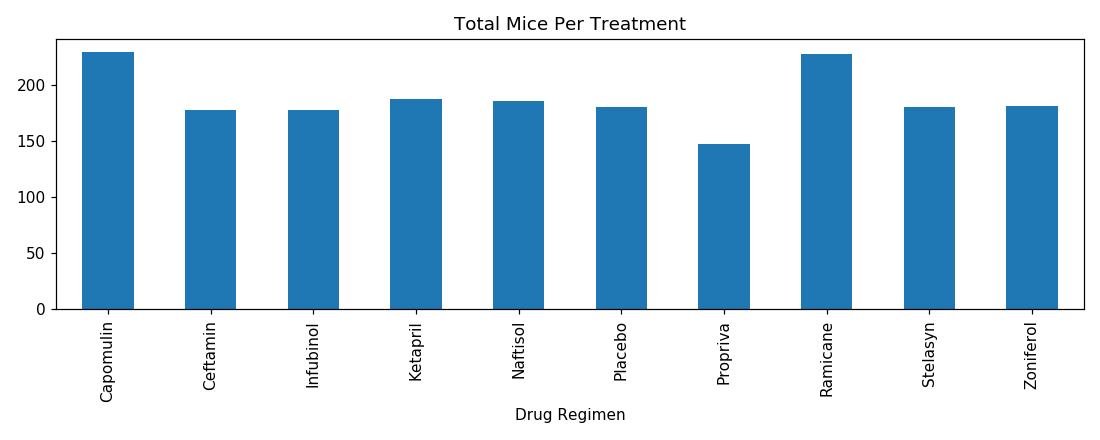

In [120]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# Filter the DataFrame down only to those columns to chart
# drug_and_timepoint = clean_study_df[["Drug Regimen", "Timepoint"]]

# Set the index to be "Drug Regimen" so they will be used as labels
# drug_and_timepoint = drug_and_timepoint.set_index('Drug Regimen')

# Use DataFrame.plot() in order to create a bar chart of the data
count_mice.plot(kind="bar", figsize=(10,4))

# Set a title for the chart
plt.title("Total Mice Per Treatment")

plt.show()
plt.tight_layout()

In [ ]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
